In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [7]:
file_path = r'C:\Users\shady\Downloads\Sales.csv' 
df = pd.read_csv(file_path)

In [9]:
df.head() #shows the first 15 columns

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,INDMKB,8/11/2020,11/11/2020,sas,as,asa,asa,asas,asas,...,42420.0,INDMKB,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2020-152156,8/11/2020,11/11/2020,Second Class,CG-12520,asasa,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2020-138688,12/6/2020,16/6/2020,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2019-108966,11/10/2019,18/10/2019,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,11/10/2019,18/10/2019,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal Code     9983 non-null   float64
 12  Region          9994 non-null   object 
 13  Product ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub-Category    9994 non-null   object 
 16  Product Name    9994 non-null   object 
 17  Sales           9994 non-null   f

In [13]:
df.describe() #quick statistical overview of numeric columns

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55245.233297,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32038.715955,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [15]:
df.isnull().sum() #Check missing values

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

In [17]:
(df.isnull().mean() * 100).round(2) #Check missing values in percentage

Row ID            0.00
Order ID          0.00
Order Date        0.00
Ship Date         0.00
Ship Mode         0.00
Customer ID       0.00
Customer Name     0.00
Segment           0.00
Country/Region    0.00
City              0.00
State             0.00
Postal Code       0.11
Region            0.00
Product ID        0.00
Category          0.00
Sub-Category      0.00
Product Name      0.00
Sales             0.00
Quantity          0.00
Discount          0.00
Profit            0.00
dtype: float64

In [19]:
df.duplicated().sum() #check full row duolicates


0

In [21]:
df.duplicated(subset=['Order ID', 'Product ID']).sum() # check buisness-key level duplicates

8

In [23]:
valid_regions = ['East', 'West', 'Central', 'South']
df = df[df['Region'].isin(valid_regions)]              # make sure Region input is correct      

In [25]:
order_id_pattern = r'^[A-Za-z]{2}-\d{4}-\d{6}$'
customer_id_pattern = r'^[A-Za-z]{2}-\d{5}$'           # Standardize patterns for customer_id and order_id

In [27]:
df['valid_order_id'] = df['Order ID'].astype(str).str.match(order_id_pattern)
df['valid_customer_id'] = df['Customer ID'].astype(str).str.match(customer_id_pattern)  # make sure the dataset matches the patterns

In [29]:
df[['valid_order_id', 'valid_customer_id']].value_counts() # check the number of valid values

valid_order_id  valid_customer_id
True            True                 9993
Name: count, dtype: int64

In [61]:
def clean_customer_name(name):
    if pd.isna(name):
        return 'Unknown'
    
    name = str(name).strip()
    
    # Rule 1: must contain letters
    if not re.search(r'[A-Za-z]', name):
        return 'Unknown'
    
    # Rule 2: repeated characters (e.g. 'aaaa', 'dsdsd')
    if len(set(name.lower().replace(' ', ''))) <= 2:
        return 'Unknown'
    
    return name


In [63]:
df['Customer Name'] = df['Customer Name'].apply(clean_customer_name)


In [67]:
df.drop(columns=['valid_order_id', 'valid_customer_id'], inplace=True)

In [69]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1,2,CA-2020-152156,8/11/2020,11/11/2020,Second Class,CG-12520,Unknown,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2020-138688,12/6/2020,16/6/2020,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2019-108966,11/10/2019,18/10/2019,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,11/10/2019,18/10/2019,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2018-115812,9/6/2018,14/6/2018,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694


In [71]:
df[df['Sales'] <= 0]
df[df['Quantity'] <= 0]  #check negative values in sales and quantity

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [73]:
df[['Sales', 'Quantity', 'Profit']].describe() #check extreme outliers

,Sales,Quantity,Profit
count,9993.000000,9993.000000,9993.000000
mean,229.854788,3.789753,28.655570
std,623.276204,2.225149,234.271792
min,0.444000,1.000000,-6599.978000
25%,17.280000,2.000000,1.728000
50%,54.480000,3.000000,8.662000
75%,209.940000,5.000000,29.364000
max,22638.480000,14.000000,8399.976000


In [75]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

reference_date = df['Order Date'].max()

customer_activity = (
    df.groupby('Customer ID')
      .agg(last_purchase_date=('Order Date', 'max'))
      .reset_index()
) #monitoring the activity of customers

customer_activity['days_since_last_purchase'] = (
    reference_date - customer_activity['last_purchase_date']
).dt.days # calculating recency

In [77]:
customer_activity['customer_status'] = customer_activity['days_since_last_purchase'].apply(
    lambda x: 'Active' if x <= 90 else 'Inactive'
) # Creating Active / Inactive flag

customer_activity['customer_status']

0      Inactive
1        Active
2      Inactive
3        Active
4      Inactive
         ...   
788      Active
789      Active
790      Active
791      Active
792    Inactive
Name: customer_status, Length: 793, dtype: object

In [79]:
customer_activity['customer_status'].value_counts()


customer_status
Active      436
Inactive    357
Name: count, dtype: int64

In [81]:
customer_orders = (
    df.groupby('Customer ID')
      .agg(total_orders=('Order ID', 'nunique'))
      .reset_index()
)   #counting orders for each customer                                                     
customer_orders 

,Customer ID,total_orders
0,AA-10315,5
1,AA-10375,9
2,AA-10480,4
3,AA-10645,6
4,AB-10015,3
...,...,...
788,XP-21865,11
789,YC-21895,5
790,YS-21880,8
791,ZC-21910,13


In [83]:
customer_orders['is_repeat_customer'] = (customer_orders['total_orders'] > 1).astype(int) #Creating Repeat Customer flag
customer_orders['is_repeat_customer']

0      1
1      1
2      1
3      1
4      1
      ..
788    1
789    1
790    1
791    1
792    1
Name: is_repeat_customer, Length: 793, dtype: int32

In [85]:
customer_orders['customer_type'] = customer_orders['is_repeat_customer'].map(
    {1: 'Repeat', 0: 'One-time'}
)
customer_orders['customer_type'].value_counts()

customer_type
Repeat      781
One-time     12
Name: count, dtype: int64

In [89]:
df['order_month'] = df['Order Date'].dt.to_period('M')

In [91]:
first_purchase = (
    df.groupby('Customer ID')['order_month']
      .min()
      .reset_index()
      .rename(columns={'order_month': 'first_purchase_month'})
) # showing first purchase for each customer
first_purchase

,Customer ID,first_purchase_month
0,AA-10315,2018-03
1,AA-10375,2018-04
2,AA-10480,2018-05
3,AA-10645,2018-06
4,AB-10015,2018-02
...,...,...
788,XP-21865,2018-01
789,YC-21895,2018-11
790,YS-21880,2019-01
791,ZC-21910,2018-10


In [93]:
df = df.merge(first_purchase, on='Customer ID', how='left')

In [95]:
df['is_new_customer'] = (df['order_month'] == df['first_purchase_month']).astype(int) #Creating New Customer flag (monthly)
df['is_new_customer'] # 1 means customer's first purchase in this month

0       0
1       1
2       1
3       1
4       1
       ..
9988    1
9989    0
9990    0
9991    0
9992    0
Name: is_new_customer, Length: 9993, dtype: int32

In [97]:
customer_month_activity = (
    df.groupby(['Customer ID', 'order_month'])
      .size()
      .reset_index(name='orders_count')
)

customer_month_activity['is_active'] = 1 #shows whether a customer was active in a given month.

In [99]:
customer_month_activity = customer_month_activity.sort_values(
    ['Customer ID', 'order_month']
)

customer_month_activity['prev_month'] = (
    customer_month_activity
    .groupby('Customer ID')['order_month']
    .shift(1)
) #Creating previous month reference per customer

In [101]:
customer_month_activity['prev_month']

0           NaT
1       2018-03
2       2018-09
3       2019-10
4       2020-03
         ...   
4614        NaT
4615    2018-08
4616    2020-04
4617    2020-05
4618    2020-07
Name: prev_month, Length: 4619, dtype: period[M]

In [103]:
customer_month_activity['expected_next_month'] = (
    customer_month_activity['order_month'] + 1
)

churn_df = customer_month_activity[['Customer ID', 'expected_next_month']].rename(
    columns={'expected_next_month': 'order_month'}
)

churn_df['churned'] = 1 #Identifing churned customers (monthly)


In [105]:
churn_df = churn_df.merge(
    customer_month_activity[['Customer ID', 'order_month']],
    on=['Customer ID', 'order_month'],
    how='left',
    indicator=True
)

churn_df = churn_df[churn_df['_merge'] == 'left_only']
churn_df = churn_df.drop(columns=['_merge'])                  #removing customers who were actually active in last month


In [107]:
monthly_churn = (
    churn_df.groupby('order_month')['Customer ID']
    .nunique()
    .reset_index(name='churned_customers')
)
monthly_churn.head()

,order_month,churned_customers
0,2018-02,29
1,2018-03,23
2,2018-04,65
3,2018-05,58
4,2018-06,62


In [109]:
monthly_active_customers = (
    df.groupby('order_month')['Customer ID']
      .nunique()
      .reset_index(name='active_customers')
) #Calculating Monthly Active Customers

monthly_active_customers.head()

,order_month,active_customers
0,2018-01,32
1,2018-02,27
2,2018-03,69
3,2018-04,64
4,2018-05,67


In [111]:
monthly_new_customers = (
    df[df['is_new_customer'] == 1]
    .groupby('order_month')['Customer ID']
    .nunique()
    .reset_index(name='new_customers')
) # counting new customers per month
monthly_new_customers.head()

,order_month,new_customers
0,2018-01,32
1,2018-02,24
2,2018-03,65
3,2018-04,56
4,2018-05,56


In [113]:
monthly_customers = (
    df.groupby('order_month')['Customer ID']
      .apply(set)
      .reset_index(name='customers')
) # Ensuring monthly customer activity table


In [115]:
churn_data = []

for i in range(1, len(monthly_customers)):
    prev_month = monthly_customers.loc[i - 1, 'order_month']
    curr_month = monthly_customers.loc[i, 'order_month']

    prev_customers = monthly_customers.loc[i - 1, 'customers']
    curr_customers = monthly_customers.loc[i, 'customers']

    churned_customers = prev_customers - curr_customers

    churn_rate = (
        len(churned_customers) / len(prev_customers)
        if len(prev_customers) > 0 else 0
    )

    churn_data.append({
        'month': curr_month,
        'churned_customers': len(churned_customers),
        'previous_month_customers': len(prev_customers),
        'churn_rate_percent': round(churn_rate * 100, 2)
        
    }) # Calculating churned customers month-over-month


In [117]:
monthly_churn = pd.DataFrame(churn_data)
monthly_churn.head()


,month,churned_customers,previous_month_customers,churn_rate_percent
0,2018-02,29,32,90.62
1,2018-03,23,27,85.19
2,2018-04,65,69,94.20
3,2018-05,58,64,90.62
4,2018-06,62,67,92.54


In [119]:
retention_data = []

for i in range(1, len(monthly_customers)):
    prev_month = monthly_customers.loc[i - 1, 'order_month']
    curr_month = monthly_customers.loc[i, 'order_month']

    prev_customers = monthly_customers.loc[i - 1, 'customers']
    curr_customers = monthly_customers.loc[i, 'customers']

    retained_customers = prev_customers & curr_customers

    retention_rate = (
        len(retained_customers) / len(prev_customers)
        if len(prev_customers) > 0 else 0
    )

    retention_data.append({
        'month': curr_month,
        'retained_customers': len(retained_customers),
        'previous_month_customers': len(prev_customers),
        'retention_rate_percent': round(retention_rate * 100, 2)
        
    }) # Calculating retained customers month-over-month


In [121]:
monthly_retention = pd.DataFrame(retention_data)
monthly_retention.head()


,month,retained_customers,previous_month_customers,retention_rate_percent
0,2018-02,3,32,9.38
1,2018-03,4,27,14.81
2,2018-04,4,69,5.80
3,2018-05,6,64,9.38
4,2018-06,5,67,7.46


In [123]:
total_sales = df['Sales'].sum()
total_orders = df['Order ID'].nunique()

aov = total_sales / total_orders #calculating AOV
aov


458.56236779796365

In [125]:
aov_df = pd.DataFrame({
    'Total Sales': [round(total_sales, 2)],
    'Total Orders': [total_orders],
    'Average Order Value': [round(aov, 2)]
})

aov_df

,Total Sales,Total Orders,Average Order Value
0,2296938.9,5009,458.56


In [127]:
monthly_aov = (
    df.groupby('order_month')
      .agg(
          total_sales=('Sales', 'sum'),
          total_orders=('Order ID', 'nunique')
      )
      .assign(aov=lambda x: x['total_sales'] / x['total_orders'])
      .reset_index()
) # calculating monthly AOV
monthly_aov.head()

,order_month,total_sales,total_orders,aov
0,2018-01,14236.895,32,444.902969
1,2018-02,4519.892,28,161.424714
2,2018-03,55691.009,71,784.380408
3,2018-04,28295.345,66,428.717348
4,2018-05,23648.287,69,342.728797


In [129]:
total_customers = df['Customer ID'].nunique()
ltv = total_sales / total_customers # Calculating LTV
round(ltv, 2) 


2896.52

In [131]:
ltv_df = pd.DataFrame({
    'Total Sales': [round(total_sales, 2)],
    'Total Customers': [total_customers],
    'Average LTV': [round(ltv, 2)]
})
ltv_df

,Total Sales,Total Customers,Average LTV
0,2296938.9,793,2896.52


In [133]:
monthly_ltv = (
    df.groupby('order_month')
      .agg(
          total_revenue=('Sales', 'sum'),
          customers=('Customer ID', 'nunique')
      )
      .assign(ltv=lambda x: x['total_revenue'] / x['customers'])
      .reset_index()
)
monthly_ltv.head()

,order_month,total_revenue,customers,ltv
0,2018-01,14236.895,32,444.902969
1,2018-02,4519.892,27,167.403407
2,2018-03,55691.009,69,807.116072
3,2018-04,28295.345,64,442.114766
4,2018-05,23648.287,67,352.959507


In [135]:
top_products = (
    df.groupby(['Product ID', 'Product Name'])
      .agg(
          total_sales=('Sales', 'sum'),
          total_orders=('Order ID', 'nunique'),
          total_quantity=('Quantity', 'sum')
      )
      .sort_values('total_sales', ascending=False)
      .reset_index()
)

top_products.head(10)


,Product ID,Product Name,total_sales,total_orders,total_quantity
0,TEC-CO-10004722,Canon imageCLASS 2200 Advanced Copier,61599.824,5,20
1,OFF-BI-10003527,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,10,31
2,TEC-MA-10002412,Cisco TelePresence System EX90 Videoconferenci...,22638.480,1,6
3,FUR-CH-10002024,HON 5400 Series Task Chairs for Big and Tall,21870.576,8,39
4,OFF-BI-10001359,GBC DocuBind TL300 Electric Binding System,19823.479,11,37
5,OFF-BI-10000545,GBC Ibimaster 500 Manual ProClick Binding System,19024.500,9,48
6,TEC-CO-10001449,Hewlett Packard LaserJet 3310 Copier,18839.686,8,38
7,TEC-MA-10001127,HP Designjet T520 Inkjet Large Format Printer ...,18374.895,3,12
8,OFF-BI-10004995,GBC DocuBind P400 Electric Binding System,17965.068,6,27
9,OFF-SU-10000151,High Speed Automatic Electric Letter Opener,17030.312,3,11


In [137]:
top_categories = (
    df.groupby('Category')
      .agg(
          total_sales=('Sales', 'sum'),
          total_orders=('Order ID', 'nunique'),
          total_quantity=('Quantity', 'sum')
      )
      .sort_values('total_sales', ascending=False)
      .reset_index()
)

top_categories

,Category,total_sales,total_orders,total_quantity
0,Technology,836154.0330,1544,6939
1,Furniture,741737.8353,1764,8026
2,Office Supplies,719047.0320,3742,22906


In [139]:
top_subcategories = (
    df.groupby(['Category', 'Sub-Category'])
      .agg(
          total_sales=('Sales', 'sum'),
          total_orders=('Order ID', 'nunique'),
          total_quantity=('Quantity', 'sum')
      )
      .sort_values('total_sales', ascending=False)
      .reset_index()
)

top_subcategories


,Category,Sub-Category,total_sales,total_orders,total_quantity
0,Technology,Phones,330007.0540,814,3289
1,Furniture,Chairs,328449.1030,576,2356
2,Office Supplies,Storage,223843.6080,777,3158
3,Furniture,Tables,206965.5320,307,1241
4,Office Supplies,Binders,203412.7330,1316,5974
5,Technology,Machines,189238.6310,112,440
6,Technology,Accessories,167380.3180,718,2976
7,Technology,Copiers,149528.0300,68,234
8,Furniture,Bookcases,114618.0363,223,866
9,Office Supplies,Appliances,107532.1610,451,1729


In [141]:
analysis_date = df['Order Date'].max() + pd.Timedelta(days=1) #latest order date + 1 day

rfm = (
    df.groupby('Customer ID')
      .agg(
          Recency=('Order Date', lambda x: (analysis_date - x.max()).days),
          Frequency=('Order ID', 'nunique'),
          Monetary=('Sales', 'sum')
      )
      .reset_index()
) #Build raw RFM table


In [149]:
rfm['R_score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm['M_score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])                             #Create RFM scores


In [159]:
rfm['RFM_Score'] = (
    rfm['R_score'].astype(int) +
    rfm['F_score'].astype(int) +
    rfm['M_score'].astype(int)
)
#Combine RFM score

In [161]:
def rfm_segment(row):
    if row['RFM_Score'] >= 444:
        return 'Champions'
    elif row['R_score'] >= 3 and row['F_score'] >= 3:
        return 'Loyal Customers'
    elif row['R_score'] >= 3:
        return 'Potential Loyalist'
    elif row['R_score'] == 1:
        return 'At Risk'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(rfm_segment, axis=1)        #Create business-friendly segments


In [163]:
rfm['Segment'].value_counts()


Segment
Loyal Customers       238
Others                200
At Risk               196
Potential Loyalist    159
Name: count, dtype: int64

In [337]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = rfm[['Recency', 'Frequency', 'Monetary']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #preparing data


In [339]:
kmeans = KMeans(n_clusters=4, random_state=42) #Applying K-Means
rfm['Cluster'] = kmeans.fit_predict(X_scaled)


In [341]:
rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean() # Interpreting clusters


,Recency,Frequency,Monetary
Cluster,,,
0,72.741611,8.516779,3322.222985
1,101.197015,4.731343,1669.688290
2,123.718750,8.296875,9479.545687
3,559.489583,3.697917,1467.499476


In [169]:
df['cohort_month'] = (
    df.groupby('Customer ID')['Order Date']
      .transform('min')
      .dt.to_period('M')
) #Identifing customer cohort (first purchase month)


In [175]:
def cohort_index(df):
    year_diff = df['order_month'].dt.year - df['cohort_month'].dt.year
    month_diff = df['order_month'].dt.month - df['cohort_month'].dt.month
    return year_diff * 12 + month_diff + 1                                   

df['cohort_index'] = cohort_index(df)                         #Calculating cohort index (months since first purchase)



In [177]:
cohort_data = (
    df.groupby(['cohort_month', 'cohort_index'])['Customer ID']
      .nunique()
      .reset_index()
)                                                        #Counting active customers per cohort per month

cohort_pivot = cohort_data.pivot(
    index='cohort_month',
    columns='cohort_index',
    values='Customer ID'
)                                                       #Converting to cohort matrix


cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0) * 100         #Converting to retention percentages

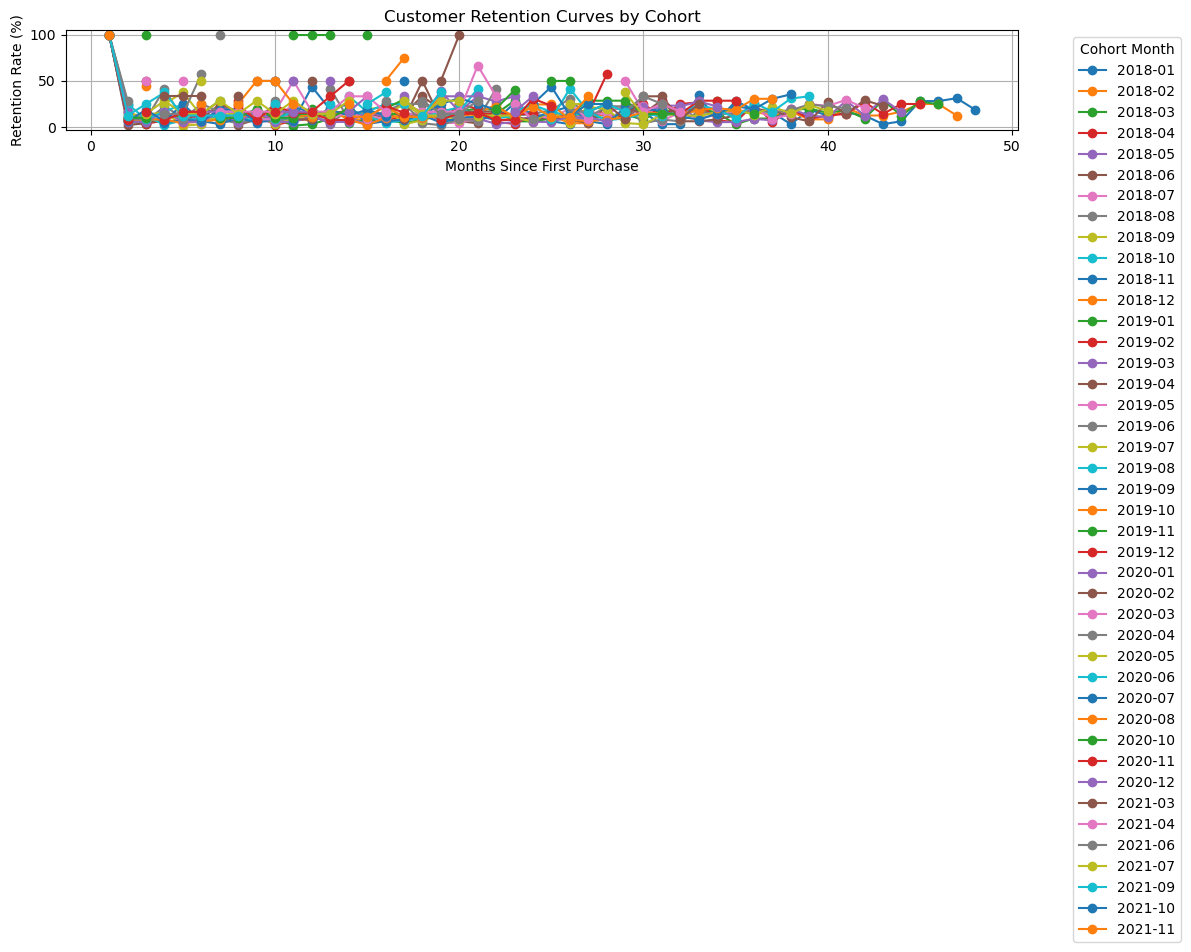

In [181]:
plt.figure(figsize=(12, 6))

for cohort in retention_matrix.index:
    plt.plot(
        retention_matrix.columns,
        retention_matrix.loc[cohort],
        marker='o',
        label=str(cohort)
    )

plt.title('Customer Retention Curves by Cohort')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Retention Rate (%)')
plt.legend(title='Cohort Month', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()                                                     #Retention Curve Visualization


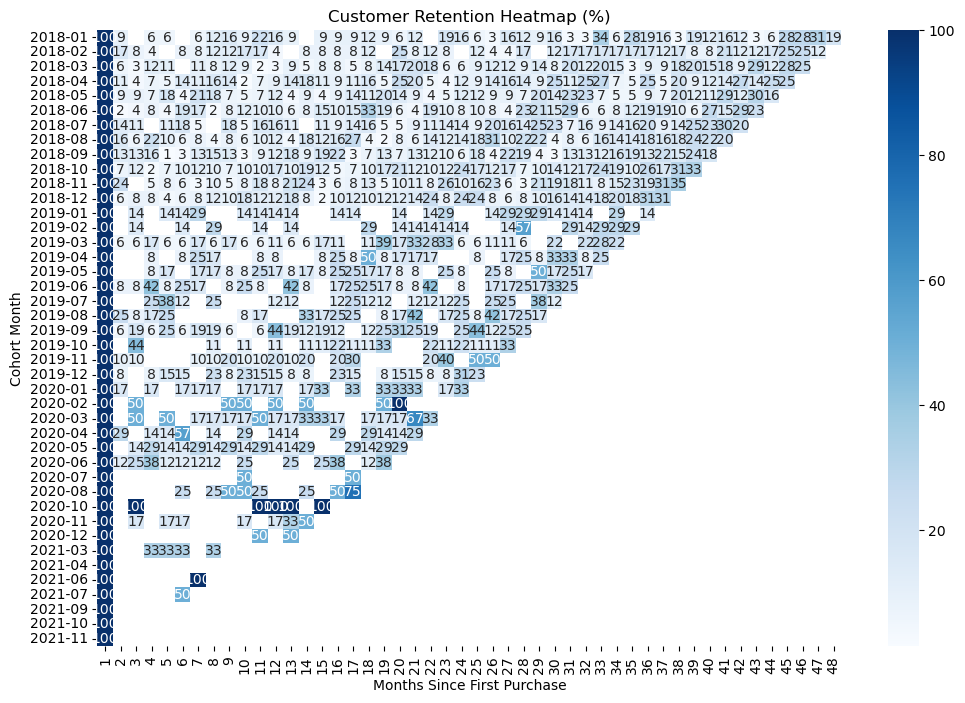

In [187]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    retention_matrix,
    annot=True,
    fmt='.0f',
    cmap='Blues'
)
plt.title('Customer Retention Heatmap (%)')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Cohort Month')
plt.show()                                               #Cohort Heatmap


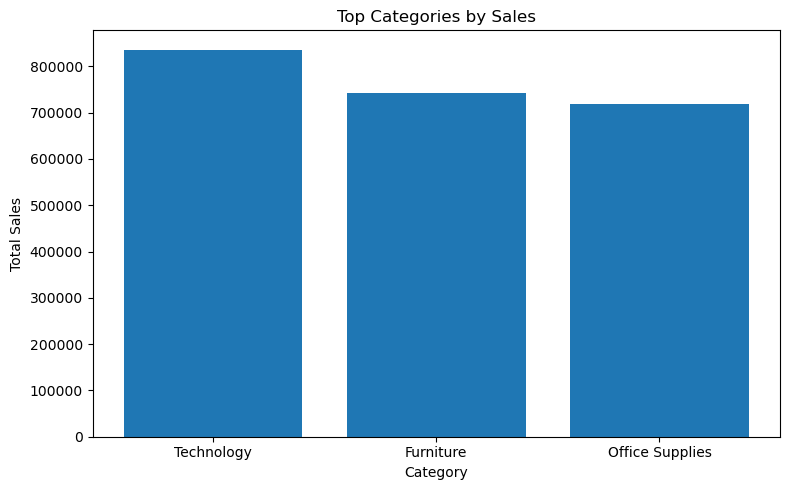

In [189]:
plt.figure(figsize=(8, 5))
plt.bar(top_categories['Category'], top_categories['total_sales'])
plt.title('Top Categories by Sales')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()                                    #Top Categories Chart
 

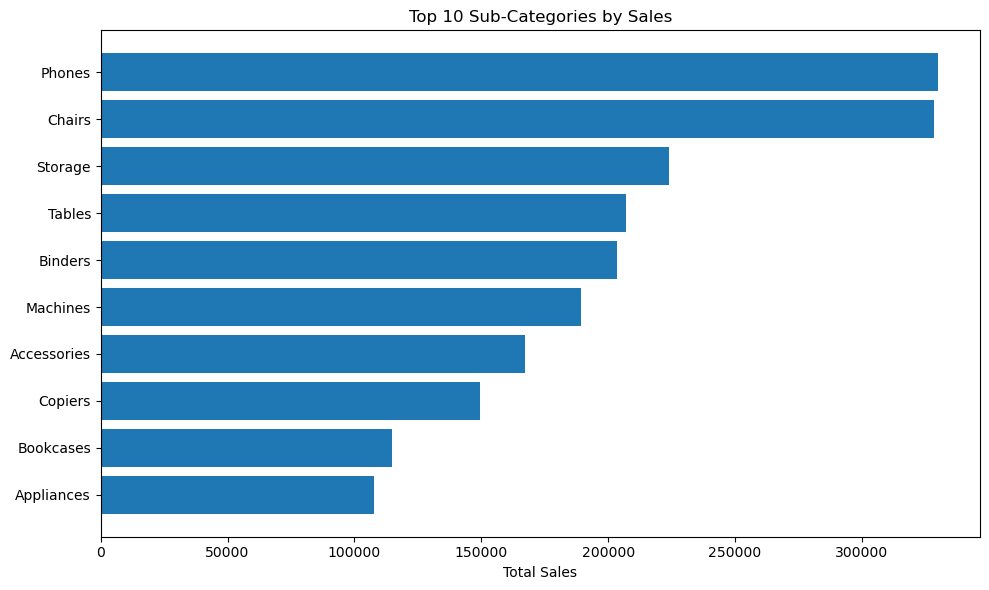

In [195]:
top_sub = top_subcategories.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_sub['Sub-Category'], top_sub['total_sales'])
plt.gca().invert_yaxis()
plt.title('Top 10 Sub-Categories by Sales')
plt.xlabel('Total Sales')
plt.tight_layout()
plt.show()                                                       #Top 10 Sub-Categories Chart


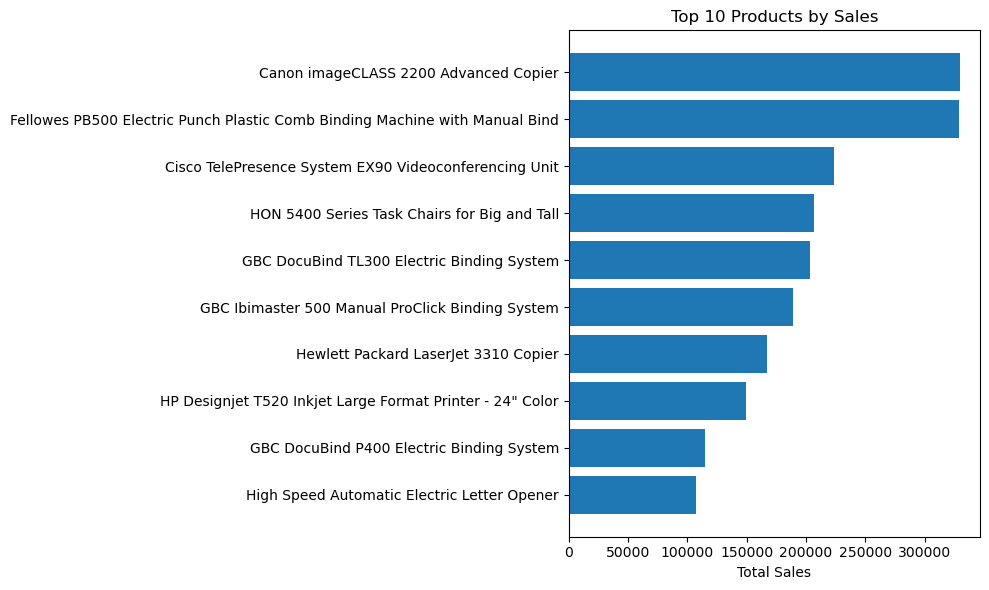

In [221]:
top_pro=top_products.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_pro['Product Name'], top_sub['total_sales'])
plt.gca().invert_yaxis()
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.tight_layout() 
plt.show()                                                    #Top 10 Products Chart

In [227]:
monthly_sales = (
    df.groupby('order_month')
      .agg(
          total_sales=('Sales', 'sum'),
          total_orders=('Order ID', 'nunique')
      )
      .reset_index()
)                                                               # Aggregating Sales Monthly


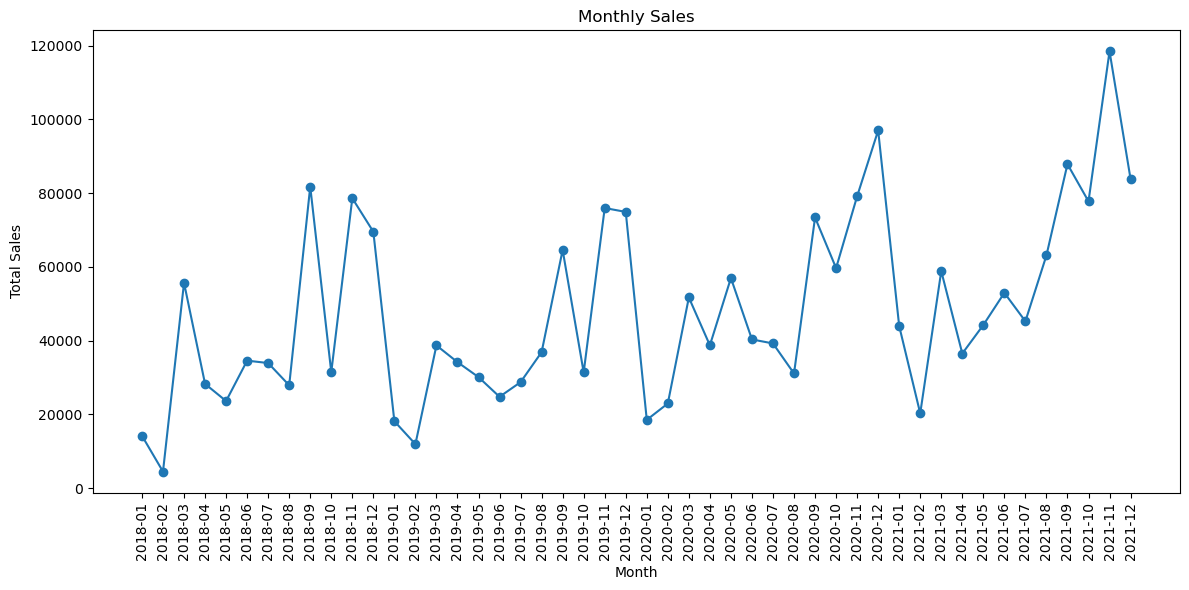

In [317]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['order_month'].astype(str),
         monthly_sales['total_sales'],
         marker='o')

plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()                                                    # Monthly Sales Chart


In [267]:
shipping_mode_perf = (
    df.groupby('Ship Mode')
      .agg(
          total_orders=('Order ID', 'nunique'),
          total_sales=('Sales', 'sum')
      )
      .reset_index()
)                                                              #Aggregating by Ship Mode

shipping_mode_perf['order_share_pct'] = (
    shipping_mode_perf['total_orders'] /
    shipping_mode_perf['total_orders'].sum() * 100
).round(2)

shipping_mode_perf['sales_share_pct'] = (
    shipping_mode_perf['total_sales'] /
    shipping_mode_perf['total_sales'].sum() * 100
).round(2)                                                    #Calculating adoption percentages


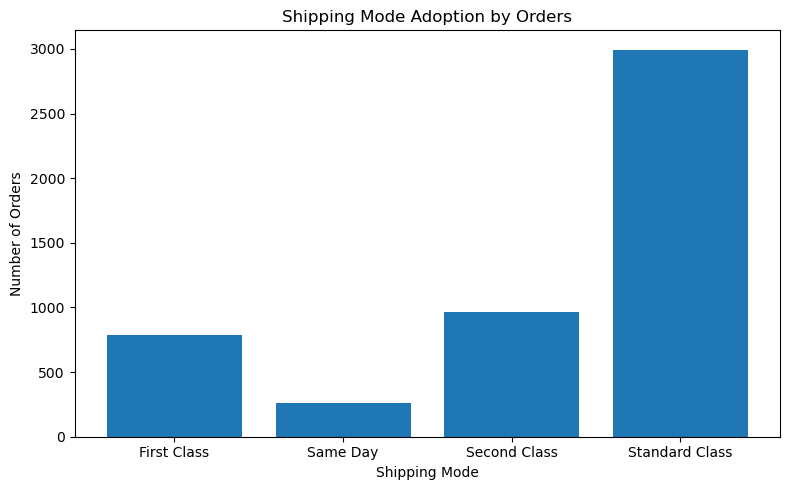

In [271]:
plt.figure(figsize=(8, 5))
plt.bar(
    shipping_mode_perf['Ship Mode'],
    shipping_mode_perf['total_orders']
)
plt.title('Shipping Mode Adoption by Orders')
plt.xlabel('Shipping Mode')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()                                       # Orders by Shipping mode Chart


In [275]:
regional_perf = (
    df.groupby('Region')
      .agg(
          total_sales=('Sales', 'sum'),
          total_orders=('Order ID', 'nunique'),
          customers=('Customer ID', 'nunique')
      )
      .reset_index()
)                                                               # Showing the performance of each Region

regional_perf['AOV'] = (
    regional_perf['total_sales'] /
    regional_perf['total_orders']
).round(2)


In [281]:
city_perf = (
    df.groupby(['State', 'City'])
      .agg(
          total_sales=('Sales', 'sum'),
          total_orders=('Order ID', 'nunique'),
          customers=('Customer ID', 'nunique')
      )
      .reset_index()
)                                                             # Showing the performance of each State and City

city_perf['AOV'] = (
    city_perf['total_sales'] /
    city_perf['total_orders']
).round(2)


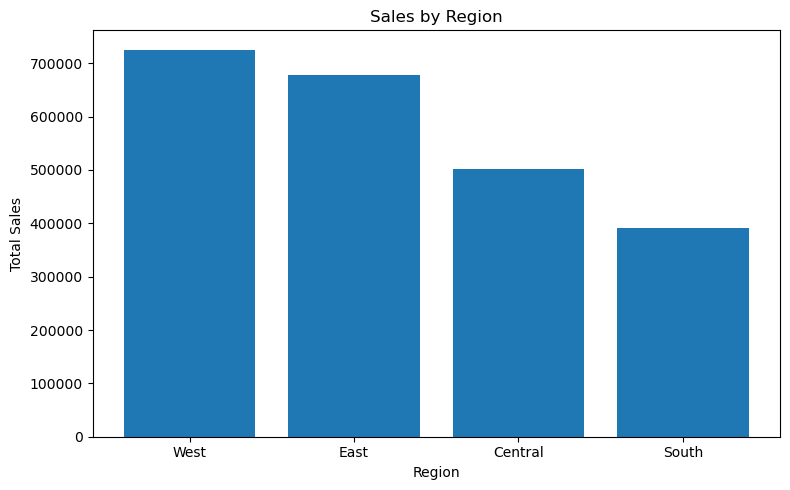

In [285]:
regional_sorted = regional_perf.sort_values('total_sales', ascending=False)

plt.figure(figsize=(8, 5))
plt.bar(regional_sorted['Region'], regional_sorted['total_sales'])
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()                                                #Regional Sales Chart                          


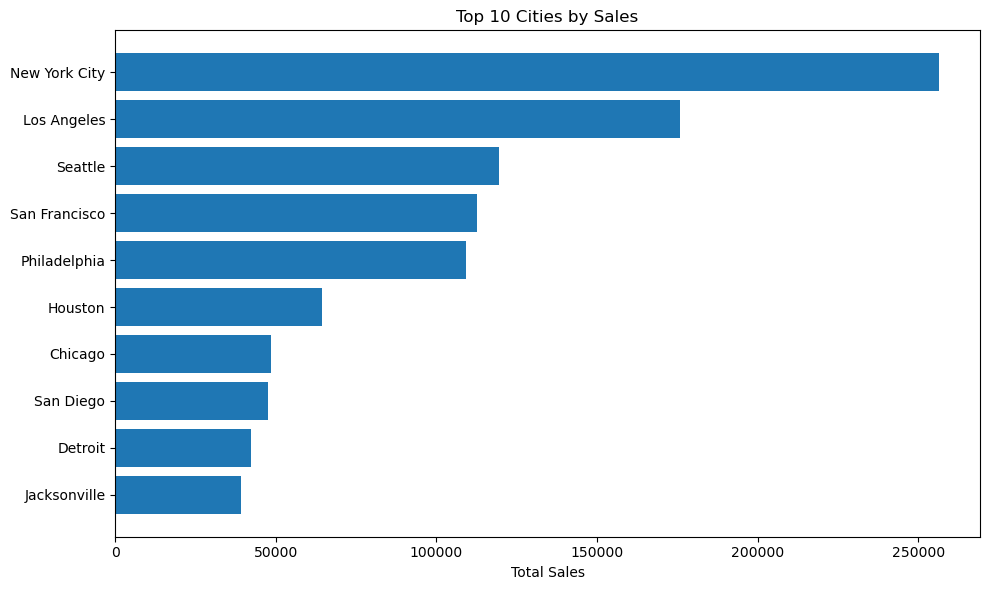

In [287]:
top_cities = city_perf.sort_values('total_sales', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_cities['City'], top_cities['total_sales'])
plt.gca().invert_yaxis()
plt.title('Top 10 Cities by Sales')
plt.xlabel('Total Sales')
plt.tight_layout() 
plt.show()                                                    #Top 10 Cities by Sales


In [299]:
monthly_profit = (
    df.groupby('order_month')
      .agg(
          total_sales=('Sales', 'sum'),
          total_profit=('Profit', 'sum')
      )
      .reset_index()
)                                                          #Aggregating Profits Monthly

monthly_profit['profit_margin_pct'] = (
    monthly_profit['total_profit'] /
    monthly_profit['total_sales'] * 100
).round(2)                                                 #Calculating Profit Margin


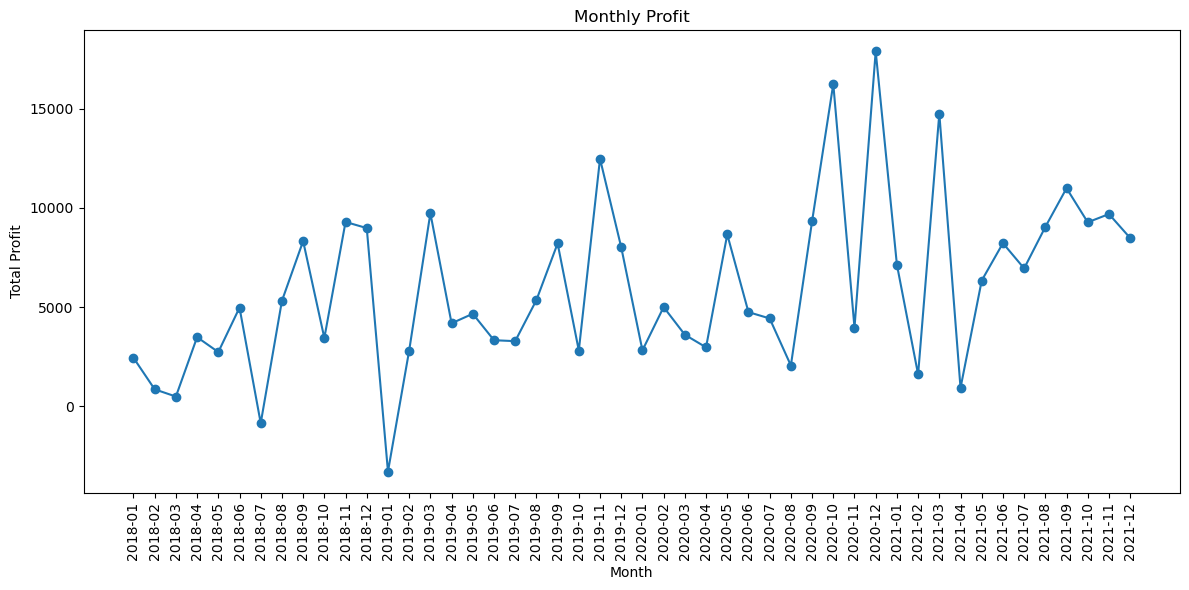

In [323]:
plt.figure(figsize=(12, 6))
plt.plot(
    monthly_profit['order_month'].astype(str),
    monthly_profit['total_profit'],
    marker='o'
)

plt.title('Monthly Profit')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()                                                  # Monthly Profit Chart


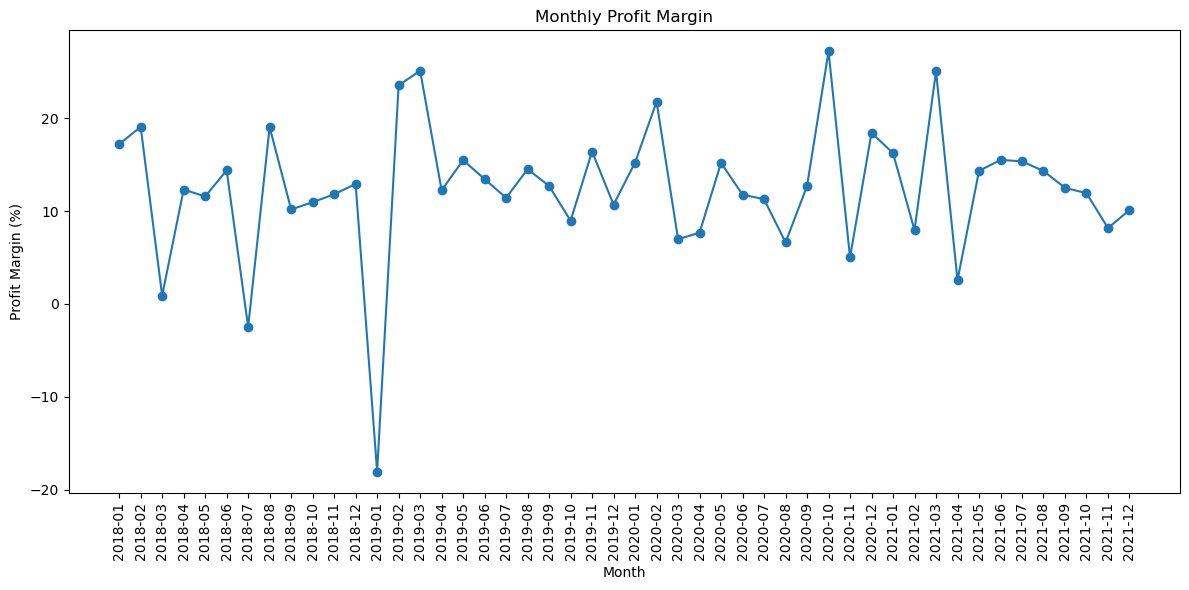

In [321]:
plt.figure(figsize=(12, 6))
plt.plot(
    monthly_profit['order_month'].astype(str),
    monthly_profit['profit_margin_pct'],
    marker='o'
)

plt.title('Monthly Profit Margin')
plt.xlabel('Month')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()                                                        # Monthly Profit Margin Chart


In [327]:
customer_month = (
    df.groupby(['Customer ID', 'order_month'])
      .agg(
          total_orders=('Order ID', 'nunique'),
          total_sales=('Sales', 'sum')
      )
      .reset_index()
)

In [331]:
customer_month['next_month'] = customer_month['order_month'] + 1

customer_month = customer_month.merge(
    customer_month[['Customer ID', 'order_month']],
    left_on=['Customer ID', 'next_month'],
    right_on=['Customer ID', 'order_month'],
    how='left',
    indicator=True
)

customer_month['churned'] = (customer_month['_merge'] == 'left_only').astype(int)  #Creating churn label
customer_month.drop(columns=['_merge'], inplace=True)


In [395]:
customer_features = (
    df.groupby(['Customer ID', 'order_month'])
      .agg(
          Frequency=('Order ID', 'nunique'),
          Monetary=('Sales', 'sum'),
          total_orders=('Order ID', 'nunique'),
          aov=('Sales', 'mean'),
          shipping_mode_perf=('Ship Mode', lambda x: x.mode().iloc[0])
      )
      .reset_index()
)                                                                 #Feature Selection


In [403]:
last_order_per_month = (
    df.groupby(['Customer ID', 'order_month'])['Order Date']
      .max()
)

customer_features = customer_features.merge(
    last_order_per_month,
    on=['Customer ID', 'order_month'],
    how='left'
)                                                                  #Feature Selection

customer_features['Recency'] = (
    customer_features['order_month'].dt.to_timestamp('M') 
    - customer_features['last_order_date']
).dt.days

customer_features.drop(columns=['last_order_date'], inplace=True)


In [415]:
customer_month = customer_month.merge(
    customer_features[
        [
            'Customer ID',
            'order_month',
            'Recency',
            'Frequency',
            'Monetary',
            'aov',
            'total_orders',
            'shipping_mode_perf'
        ]
    ],
    on=['Customer ID'],
    how='left'
)                                                     #Merging the DataFrames


In [491]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


X = customer_month[['Recency','Frequency','Monetary','aov','total_orders_x','shipping_mode_perf']]
y = customer_month['churned']

X = pd.get_dummies(X, columns=['shipping_mode_perf'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)                                                            #Training the Model

model = LogisticRegression(max_iter=1000)               #logistic Regression is perfect to predict probabilities between 0 and 1 
model.fit(X_train, y_train)                             #LR  provides coefficients that clearly show how much each factor 
                                                        #increases or decreases the likelihood of churn


LogisticRegression(max_iter=1000)

In [493]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))         #Evaluating the Model with roc_auc_score as it effectively evaluates
                                                          # a model's ability to distinguish between customers who will leave 
                                                          # (churn) and those who will stay
                                                           


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       887
           1       0.86      1.00      0.92      5282

    accuracy                           0.86      6169
   macro avg       0.43      0.50      0.46      6169
weighted avg       0.73      0.86      0.79      6169

ROC AUC: 0.500239801038775


C:\Users\shady\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shady\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shady\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [441]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_[0]
}).sort_values(by='coefficient', ascending=False)      # Logistic Regression Coefficients


In [443]:
feature_importance                                 #Positive coefficient increases churn probability
                                                   #Negative coefficient → reduces churn risk

,feature,coefficient
4,total_orders_x,0.032126
6,shipping_mode_perf_Second Class,0.029939
2,Monetary,0.000027
0,Recency,-0.000025
3,aov,-0.000061
7,shipping_mode_perf_Standard Class,-0.060997
1,Frequency,-0.148713
5,shipping_mode_perf_Same Day,-0.185684
